In [1]:
# the temporal difference 0 method to find the optimal policy
# only policy evaluation, not optimization
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

#os.environ['KMP_DUPLICATE_LIB_OK']='True'
datax = scipy.io.loadmat("xtrain_hati20.mat")
z_true = scipy.io.loadmat("trj_hati.mat")
trj_data = z_true["xxhati"]
spike_data = datax["yy"]

GAMMA = 0.9
ALPHA = 0.1

In [2]:
# initialize V(s) and returns
V = np.zeros((12,12))

In [7]:
# repeat until convergence
for it in range(10):
    for t in range(499):
        x = int(trj_data[t][0]) + 6
        y = int(trj_data[t][1])+6
        x_next = int(trj_data[t+1][0])+6
        y_next = int(trj_data[t+1][1])+6
        if y == 3 or x == 1 or y == 1:
            r = 1
        else: r=1
        V[x][y] = V[x][y] + ALPHA*(r + GAMMA*V[x_next][y_next] - V[x][y])

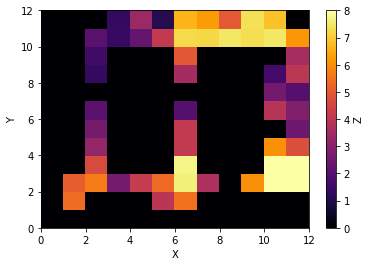

In [10]:
X, Y = np.mgrid[0:13:1, 0:13:1]
#X-=.0
#Y-=.0
#print(V)
z=np.zeros([12,12])
for i in range(12):
    for j in range(12):
        z[i,j] = V[i][j]
fig, ax = plt.subplots()
im = ax.pcolormesh(X, Y, z, cmap='inferno',vmin=0,vmax=8)
ax.set_xlabel("X")
ax.set_ylabel("Y")
cbar = fig.colorbar(im)
cbar.set_label("Z")
plt.show()